**Executed:** Mon Jun  6 14:19:10 2016

**Duration:** 8 seconds.

# Figure FRET vs distance

> *This notebook creates the figure FRET vs distance for the series of dsDNA samples.*

## Import software

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
import seaborn as sns
%matplotlib inline
#%config InlineBackend.figure_format='retina'  # for hi-dpi displays

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from numpy import pi, cos, sin

In [3]:
figure_size = (5, 4)
default_figure = lambda: plt.subplots(figsize=figure_size)
save_figures = True

def savefig(filename, **kwargs):
    if not save_figures:
        return
    import os
    dir_ = 'figures/'
    kwargs_ = dict(dpi=300, bbox_inches='tight')
                   #frameon=True, facecolor='white', transparent=False)
    kwargs_.update(kwargs)
    plt.savefig(dir_ + filename, **kwargs_)

In [4]:
sns.set_style('whitegrid')

# B-DNA Model

In [5]:
r = 1        # (nm) dsDNA radius
δ = 0.34     # (nm) dsDNA base-pair pitch
n = 10.5     # number of bases per turn
Δφ = 132.4   # (degree) minor-grove angle between the two strands backbones

<img src="DNA1.png" style="width:300px;float:left;">
<img src="DNA2.png" style="width:300px;float:left;">
<img src="DNA3.png" style="width:300px;float:left;">

This function computes the dye position according to the passed parameters:

In [6]:
def dye_position(i, l=1.6, λ=0.5, ψ=0):
    # global structural params: r, δ, n, Δφ
    Δφr = Δφ*pi/180
    φ = 2*pi/n  # (radiants) rotation for base-pair
    Dx = r * cos(φ*i) + λ*( r*cos(φ*i + Δφr) - r*cos(φ*i) ) + l*cos(ψ)*cos(φ*i + 0.5*Δφr)
    Dy = r * sin(φ*i) + λ*( r*sin(φ*i + Δφr) - r*sin(φ*i) ) + l*cos(ψ)*sin(φ*i + 0.5*Δφr)
    Dz = i*δ + l*sin(ψ)
    return np.array([Dx, Dy, Dz])

Function to plot the dye position:

In [7]:
def plot_dye(P, axes=None, **kws):
    kws_ = dict(marker='o', ls='-')
    kws_.update(kws)
    if axes is None:
        fig = plt.figure(figsize=(9, 9))
        ax_xy = plt.subplot2grid((2,2), (1,0))
        ax_xz = plt.subplot2grid((2,2), (0,0))
        ax_yz = plt.subplot2grid((2,2), (0,1))
        ax_3d = fig.add_subplot(224, projection='3d')
    else:
        ax_xy, ax_xz, ax_yz, ax_3d = axes

    ax_xy.plot(P[0], P[1], **kws_)
    ax_xz.plot(P[0], P[2], **kws_)
    ax_yz.plot(P[1], P[2], **kws_)
    for ax in (ax_xy, ax_xz):
        ax.set_xlabel('x (nm)')
    ax_xy.set_ylabel('y (nm)')
    ax_xz.set_xlabel('x (nm)')
    ax_xz.set_ylabel('z (nm)')
    ax_yz.set_xlabel('y (nm)')
    ax_yz.set_ylabel('z (nm)')
    lim = max(1.5, np.abs(P[0]).max(), np.abs(P[1]).max())*1.05
    
    ax_xy.set_xlim(-lim, lim)
    ax_xy.set_ylim(-lim, lim)
    ax_xz.set_xlim(-lim, lim)
    ax_yz.set_xlim(-lim, lim)

    ax_3d.plot(P[0], P[1], P[2], **kws_)
    return (ax_xy, ax_xz, ax_yz, ax_3d)

FRET as a function of $R$ and $R_0$:

In [8]:
def fret(R, R0):
    return 1 / (1 + (R/R0)**6)

## Dyes Parameters

In [9]:
λ = 0.5 
ψ = 0
i = 7    # number of bases from reference "base 0"
l = 1.6  # (nm) distance between S and dye position D

In [10]:
dye_position(7)

array([ 1.18330521, -1.61678154,  2.38      ])

In [11]:
D_params = dict(l=1, λ=1, ψ=0)
A_params = dict(l=1, λ=0, ψ=-pi/2)

In [12]:
bp = np.arange(0, 1)

PD = dye_position(bp, **D_params)
PA = dye_position(bp, **A_params)

In [13]:
bp1 = np.arange(0, 10.1, 0.02)

PD1 = dye_position(bp1, **D_params)
PA1 = dye_position(bp1, **A_params)

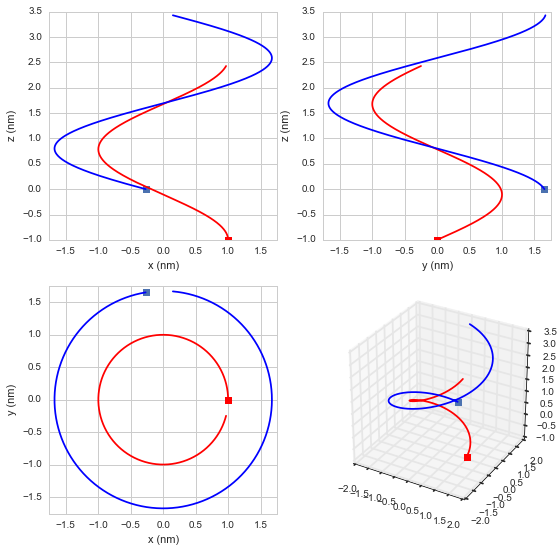

In [14]:
axes = plot_dye(PD, marker='s')
plot_dye(PA, axes, color='r',  marker='s');
plot_dye(PA1, axes, marker='', ls='-', color='r');
plot_dye(PD1, axes, marker='', ls='-', color='b');

In [15]:
bp = np.arange(0, 40, 0.1)

In [16]:
PD = dye_position(bp, l=1.6, λ=0.2, ψ=0)
PA = dye_position(0, l=1.6, λ=0.8, ψ=-pi/2)
R = np.linalg.norm(PD.T - PA, axis=1)
#R

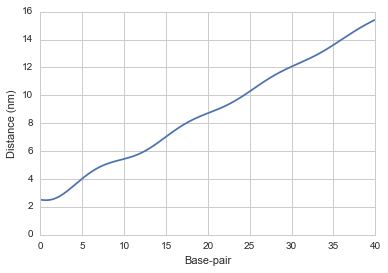

In [17]:
plt.plot(bp, R);
plt.xlabel('Base-pair')
plt.ylabel('Distance (nm)')
plt.ylim(0);

In [18]:
R0 = 6.7  # nm

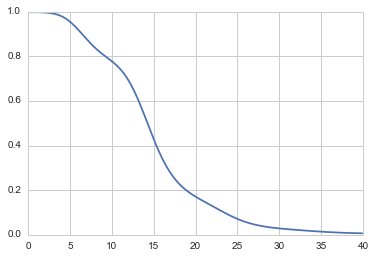

In [19]:
plt.plot(bp, fret(R, R0));

# Load data

In [20]:
E_mspot = pd.read_csv(
    'results/Multi-spot - dsDNA - Corrected E - all_samples all_ch.csv', index_col=0)
E_mspot.columns.name = 'Channel'
E_mspot

Channel,0,1,2,3,4,5,6,7
Sample,,,,,,,,
7d,0.930914,0.934540,0.915492,0.917740,0.913077,0.926113,0.915984,0.919785
12d,0.744011,0.734672,0.728426,0.730477,0.720851,0.714550,0.722517,0.720274
17d,0.438010,0.422566,0.406334,0.412035,0.416501,0.417540,0.400844,0.400445
22d,0.170135,0.169225,0.157119,0.158961,0.145404,0.155616,0.151842,0.165719
27d,0.074061,0.092109,0.059325,0.067704,0.055978,0.071909,0.057572,0.065818


In [21]:
data_file = 'results/usALEX-5samples-E-corrected-all-ph.csv'
data_alex = pd.read_csv(data_file).set_index('sample')
E_alex = data_alex.E_gauss_w
E_alex.index.name = 'Sample'
E_alex

Sample
7d     0.924307
12d    0.727043
17d    0.422624
22d    0.181067
27d    0.083971
Name: E_gauss_w, dtype: float64

# FRET vs distance figure

In [22]:
%config InlineBackend.figure_format='retina'  # for hi-dpi displays

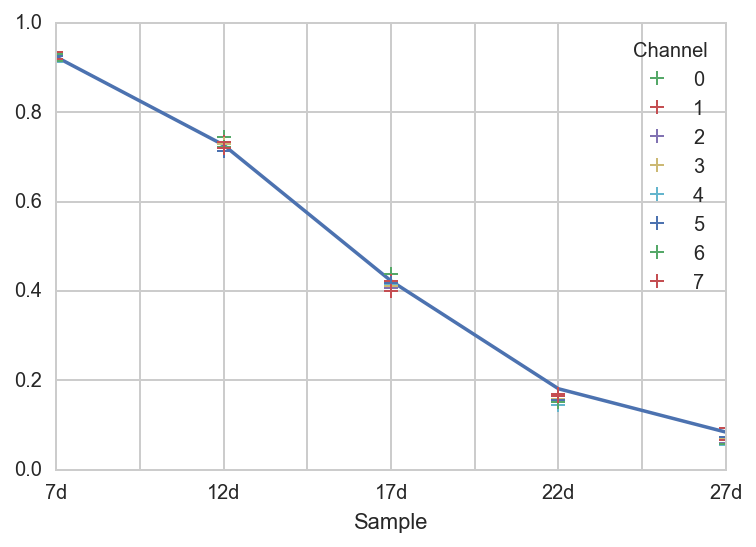

In [23]:
fig, ax = plt.subplots()
E_alex.plot(ax=ax)
E_mspot.plot(marker='+', mew=1, ls='none', ax=ax)

In [24]:
E_alexi = E_alex.rename(lambda x: int(x[:-1])).to_frame()
E_alexi.columns = ['μs-ALEX']
E_alexi

,μs-ALEX
Sample,
7,0.924307
12,0.727043
17,0.422624
22,0.181067
27,0.083971


In [25]:
E_mspoti = E_mspot.rename(lambda x: int(x[:-1]))
#E_mspoti

In [26]:
sns.set(style='ticks', font_scale=1.4)

In [27]:
R0 = 7.3  # nm Forster Radius
PD = dye_position(bp, l=2, λ=0.6, ψ=0)
PA = dye_position(0, l=1.6, λ=0.4, ψ=-pi/2)
R = np.linalg.norm(PD.T - PA, axis=1)

In [28]:

pitch = δ*n 
min_groove_pitch = 1.2
min_groove_pitch/pitch * 360

121.00840336134453

In [29]:
sns.set_style('whitegrid')

In [30]:
bp = np.arange(0, 30, 0.2)
bpm = np.array([7, 12, 17, 22, 27])

In [31]:
D_params = dict(l=2.4, λ=0.5, ψ=pi)
A_params = dict(l=2, λ=0.5, ψ=-1.2*pi/2)
n = 10.5     # number of bases per turn
Δφ = 131     # (degree) minor-grove angle between the two strands backbones
R0 = 7.5 # nm Forster Radius

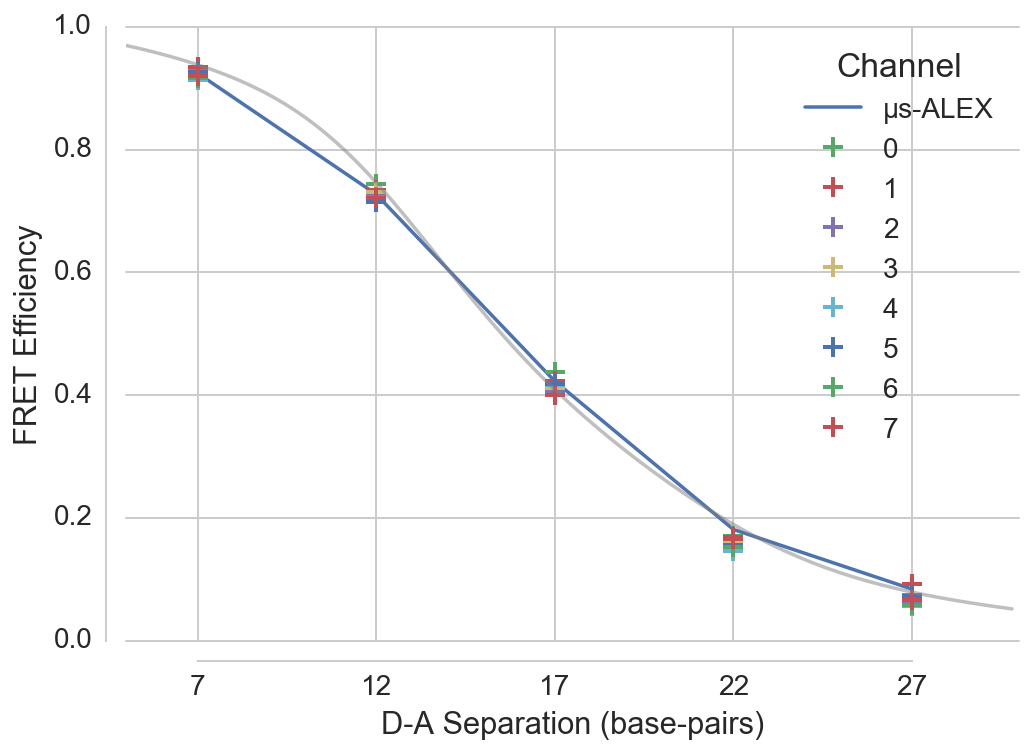

In [32]:
PD = dye_position(bp, **D_params)
PA = dye_position(0, **A_params)
R = np.linalg.norm(PD.T - PA, axis=1)

fig, ax = plt.subplots()
E_alexi.plot(ax=ax, label='usALEX')
E_mspoti.plot(marker='+', mew=2, ms=10, ls='none', ax=ax)
ax.set_ylim(0)
ax.set_xlim(5, 30)
ax.set_xlabel('D-A Separation (base-pairs)')
ax.set_ylabel('FRET Efficiency')
plt.xticks(E_alexi.index)
sns.despine(trim=True, offset=10, ax=ax)
ax.plot(bp, fret(R, R0), color='gray', alpha=0.5);
savefig('multi-spot E vs distance.png');

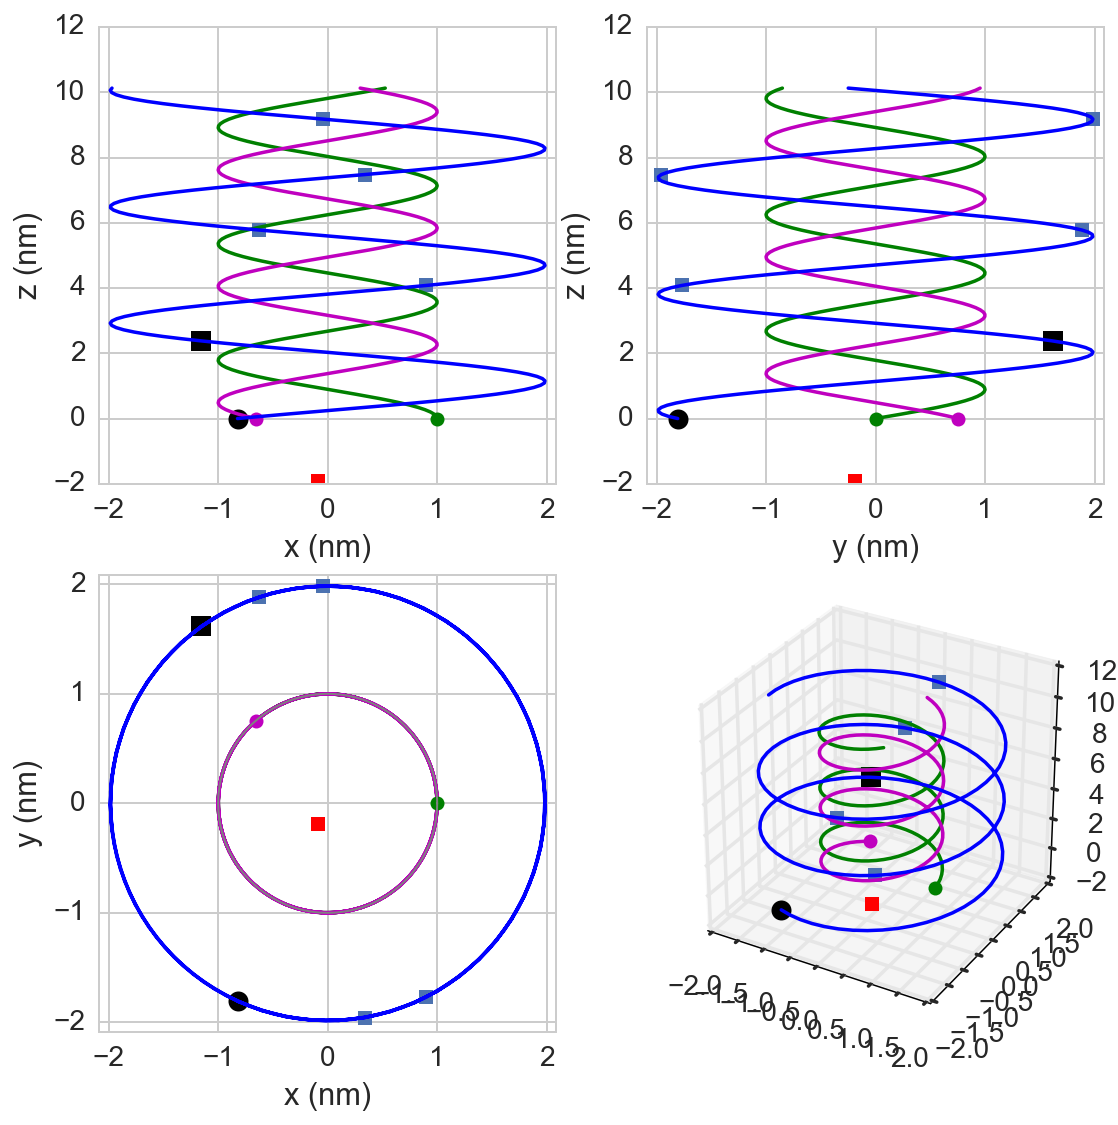

In [33]:
PD0 = dye_position(bp, l=0, λ=0, ψ=0)
PA0 = dye_position(bp, l=0, λ=1, ψ=0)
PDm = dye_position(bpm, **D_params)
axes = plot_dye(PDm, marker='s', ls='')
plot_dye(PDm[:, :1], axes, color='k',  marker='s', ms=10);
plot_dye(PD[:, :1], axes, color='k',  marker='o', ms=10);
plot_dye(PA[:, np.newaxis], axes, color='r',  marker='s');

plot_dye(PD0, axes, color='g', marker='', ls='-');
plot_dye(PA0, axes, color='m', marker='', ls='-');
plot_dye(PD0[:, :1], axes, color='g', marker='o');
plot_dye(PA0[:, :1], axes, color='m', marker='o');

t = np.arange(361)
axes[0].plot(cos(t/180*pi), sin(t/180*pi), lw=1, color='gray');
plot_dye(PD, axes, marker='', ls='-', color='b');

In [34]:
# leg = ax[1].get_legend()
# h, l = ax[1].get_legend_handles_labels()
# ax[1].legend(h[1:] + h[:1], l[1:] + l[:1], title='Sample', loc='lower right')
